# Multiple Linear Regresson
## a model to find the co2 emisson from different kinds of vehicles

In [1]:
# import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model

In [2]:
# read data from csv file to a dataframe dataset
data=pd.read_csv('Fuel.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
selected_cols=['ENGINESIZE',
               'CYLINDERS',
               'FUELCONSUMPTION_CITY',
               'FUELCONSUMPTION_HWY',
               'FUELCONSUMPTION_COMB',
               'CO2EMISSIONS']

In [7]:
df=data[selected_cols]

In [8]:
# generate training and testing data: 80% for train
msk=np.random.rand(len(data))<0.8
train=df[msk]
test=df[~msk]

In [9]:
# use mul_linear regression model
regr=linear_model.LinearRegression()
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
print('the coefficient is: {}'.format(regr.coef_))

the coefficient is: [[10.46804974  7.45484806  9.66399916]]


Text(0, 0.5, 'CO2 emission')

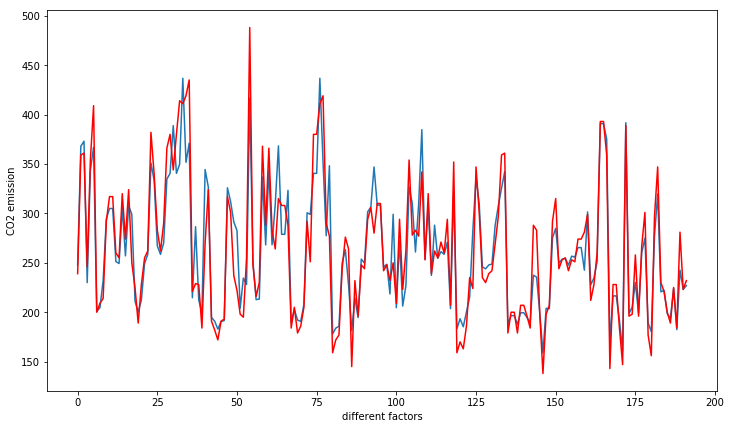

In [10]:
plt.figure(figsize=(12,7))
y_pred=regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_x=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
plt.plot(y_pred)
plt.plot(test_y,color='r')
plt.xlabel('different factors')
plt.ylabel('CO2 emission')

In [11]:
# evaluate the model
print('mean of error square is {}'.format(np.mean((y_pred-test_y)**2)))
print('score is {}'.format(regr.score(test_x,test_y)))


mean of error square is 637.7234317305334
score is 0.8625518781964319


The linear regression has R2=0.76, and the mul_linear regression has R2=0.86.
We can see that, when more factors are used, the accuracy is improved